<a href="https://colab.research.google.com/github/Jakelinecs/Tareas-Machine-Learning/blob/main/N23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Model 1: Tanh activation with simple initialization and SGD
Epoch 1/10, Train Loss: 2.3023 , Val Loss: 2.3023
Epoch 2/10, Train Loss: 2.3023 , Val Loss: 2.3023
Epoch 3/10, Train Loss: 2.3023 , Val Loss: 2.3023
Epoch 4/10, Train Loss: 2.3023 , Val Loss: 2.3023
Epoch 5/10, Train Loss: 2.3023 , Val Loss: 2.3023
Epoch 6/10, Train Loss: 2.3023 , Val Loss: 2.3023
Epoch 7/10, Train Loss: 2.3023 , Val Loss: 2.3023
Epoch 8/10, Train Loss: 2.3023 , Val Loss: 2.3023
Epoch 9/10, Train Loss: 2.3023 , Val Loss: 2.3023
Epoch 10/10, Train Loss: 2.3023 , Val Loss: 2.3023
Validation Accuracy:  0.1532


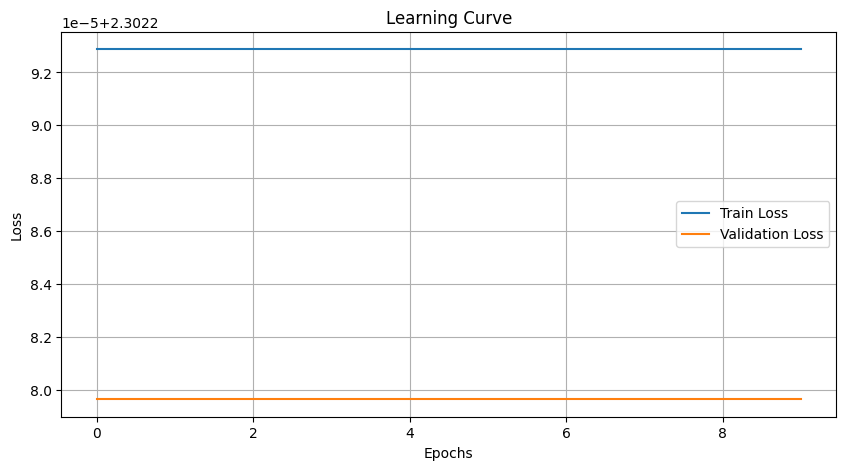

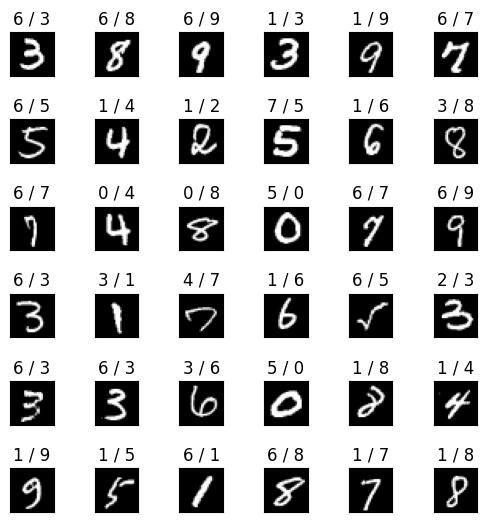


Model 2: Relu activation 
Epoch 1/10, Train Loss: 2.3677 , Val Loss: 2.3664
Epoch 2/10, Train Loss: 2.3677 , Val Loss: 2.3664
Epoch 3/10, Train Loss: 2.3677 , Val Loss: 2.3664
Epoch 4/10, Train Loss: 2.3677 , Val Loss: 2.3664
Epoch 5/10, Train Loss: 2.3677 , Val Loss: 2.3664
Epoch 6/10, Train Loss: 2.3677 , Val Loss: 2.3664
Epoch 7/10, Train Loss: 2.3677 , Val Loss: 2.3664
Epoch 8/10, Train Loss: 2.3677 , Val Loss: 2.3664
Epoch 9/10, Train Loss: 2.3677 , Val Loss: 2.3664
Epoch 10/10, Train Loss: 2.3677 , Val Loss: 2.3664
Validation Accuracy:  0.1061


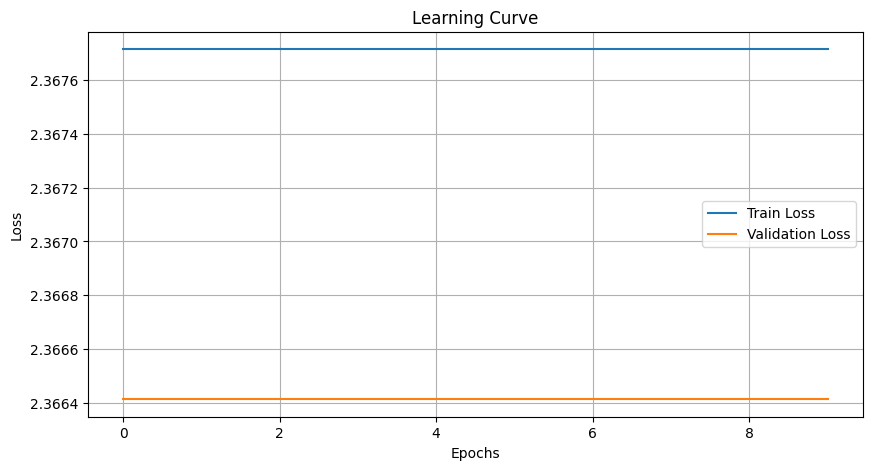

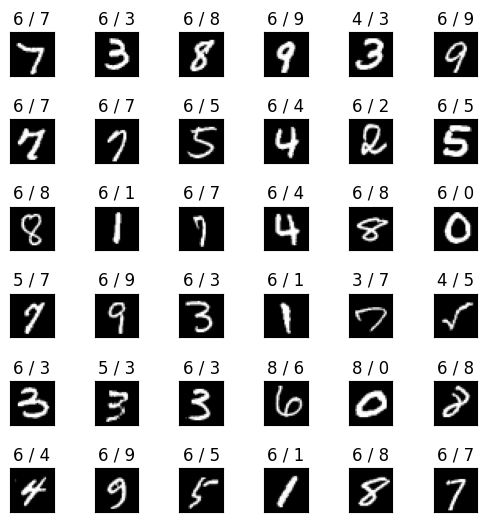


Model 3: Deeper activation 
Epoch 1/10, Train Loss: 2.3916 , Val Loss: 2.3877
Epoch 2/10, Train Loss: 2.3916 , Val Loss: 2.3877
Epoch 3/10, Train Loss: 2.3916 , Val Loss: 2.3877
Epoch 4/10, Train Loss: 2.3916 , Val Loss: 2.3877
Epoch 5/10, Train Loss: 2.3916 , Val Loss: 2.3877
Epoch 6/10, Train Loss: 2.3916 , Val Loss: 2.3877
Epoch 7/10, Train Loss: 2.3916 , Val Loss: 2.3877
Epoch 8/10, Train Loss: 2.3916 , Val Loss: 2.3877
Epoch 9/10, Train Loss: 2.3916 , Val Loss: 2.3877
Epoch 10/10, Train Loss: 2.3916 , Val Loss: 2.3877
Validation Accuracy:  0.1023


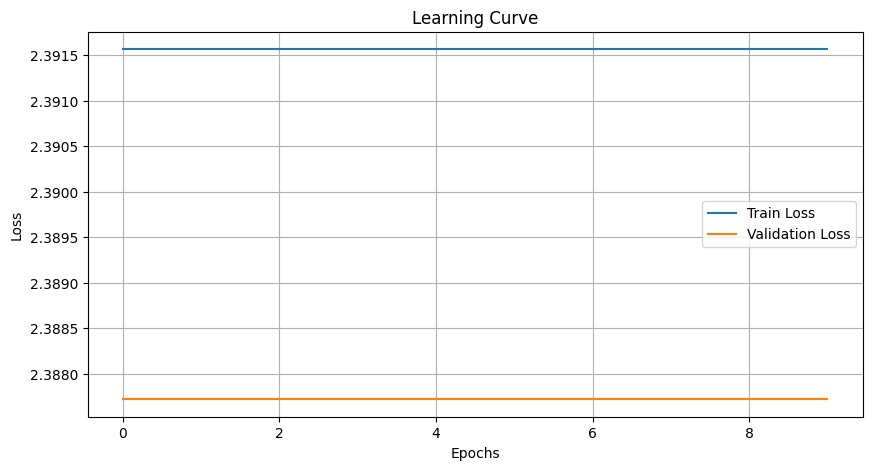

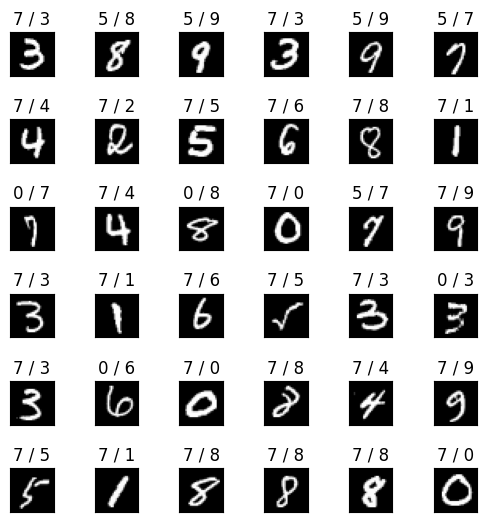

In [1]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
import matplotlib.pyplot as plt


#   P1
class FC:

    def __init__(self, n_nodes1, n_nodes2, initializer, optimizer):
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.initializer = initializer
        self.optimizer = optimizer
        self.W = self.initializer.W(self.n_nodes1, self.n_nodes2)
        self.B = self.initializer.B(self.n_nodes2)


    def forward(self, X):

        self.X = X
        return np.dot(X, self.W) + self.B

    def backward(self, dA):

        batch_size = self.X.shape[0]
        self.dW = np.dot(self.X.T, dA)
        self.dB = np.sum(dA, axis=0)
        dZ = np.dot(dA, self.W.T)
        return dZ


#   P2

class SimpleInitializer:

    def __init__(self, sigma):
        self.sigma = sigma

    def W(self, n_nodes1, n_nodes2):
        return self.sigma * np.random.randn(n_nodes1, n_nodes2)

    def B(self, n_nodes2):
        return np.zeros(n_nodes2)


#  P6
class XavierInitializer:

    def __init__(self):
        pass

    def W(self, n_nodes1, n_nodes2):
        sigma = np.sqrt(1 / n_nodes1)
        return sigma * np.random.randn(n_nodes1, n_nodes2)

    def B(self, n_nodes2):
        return np.zeros(n_nodes2)



class HeInitializer:

    def __init__(self):
        pass

    def W(self, n_nodes1, n_nodes2):
        sigma = np.sqrt(2 / n_nodes1)
        return sigma * np.random.randn(n_nodes1, n_nodes2)

    def B(self, n_nodes2):
        return np.zeros(n_nodes2)

#   P3
class SGD:

    def __init__(self, lr):
        self.lr = lr

    def update(self, layer):

        layer.W -= self.lr * layer.dW
        layer.B -= self.lr * layer.dB
        return layer

#   p7

class AdaGrad:

    def __init__(self, lr):
        self.lr = lr
        self.H = {}

    def update(self, layer):

        if id(layer) not in self.H:
            self.H[id(layer)] = {
                'HW' : np.zeros_like(layer.W),
                'HB' : np.zeros_like(layer.B)
            }

        HW = self.H[id(layer)]['HW']
        HB = self.H[id(layer)]['HB']

        HW += layer.dW ** 2
        HB += layer.dB ** 2


        layer.W -= self.lr * (1 / (np.sqrt(HW) + 1e-7)) * layer.dW
        layer.B -= self.lr * (1 / (np.sqrt(HB) + 1e-7)) * layer.dB
        return layer


#   P4 and P5
    """Función Activacion"""
class Tanh:
    def forward(self, A):
        self.A = A
        return np.tanh(A)

    def backward(self, dZ):
        # Derivada de tanh(A): 1 - tanh^2(A)
        return dZ * (1 - np.tanh(self.A)**2)


class Sigmoid:
    def forward(self, A):
        self.A = A
        return 1/ (1 + np.exp(-A))

    def backward(self, dZ):

        sig = 1/ (1 + np.exp(-self.A))
        return dZ * sig * (1 - sig)


class ReLU:
    """ReLU (Rectified Linear Unit)"""
    def forward(self, A):
        self.A = A
        return np.maximum(0, A)

    def backward(self, dZ):
        return dZ * (self.A > 0 )


class Softmax:
    """Función Softmax (Capa de Salida)"""
    def forward(self, A):

        exp_A = np.exp(A - np.max(A, axis=1, keepdims=True))
        self.Z = exp_A / np.sum(exp_A, axis=1, keepdims=True)
        return self.Z


    def backward(self, Y, Z):
        batch_size = Y.shape[0]
        dL_dA = (Z - Y) / batch_size
        return dL_dA




#   P8
class ScratchDeepNeuralNetrowkClassifier():

    def __init__(self, layers_config, initializer='simple', optimizer = 'sgd',
                 sigma=0.01, lr=0.01, epochs = 10,
                 batch_size=20, verbose=True):


        self.layers_config = layers_config
        self.sigma = sigma
        self.lr = lr
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose

        self._initialize_layers(initializer, optimizer)

        self.train_loss = []
        self.val_loss = []


    def _initialize_layers(self, initializer, optimizer):


        if initializer == 'simple':
            initializer = SimpleInitializer(self.sigma)
        elif initializer == 'xavier':
            initializer = XavierInitializer()
        elif initializer == 'he':
            initializer = HeInitializer()

        if optimizer == 'sgd':
            optimizer = SGD(self.lr)
        elif optimizer == 'adagrad':
            optimizer = AdaGrad(self.lr)

        self.layers = []
        self.activations = []

        for i, config in enumerate(self.layers_config):

            n_nodes1 = config['input_dim'] if i == 0 else self.layers_config[i-1]['output_dim']
            n_nodes2 = config['output_dim']
            self.layers.append(FC(n_nodes1, n_nodes2, initializer, optimizer))


            if config['activation'] == 'tanh':
                self.activations.append(Tanh())
            elif config['activation'] == 'sigmoid':
                self.activations.append(Sigmoid())
            elif config['activation'] == 'relu':
                self.activations.append(ReLU())
            elif config['activation'] == 'softmax':
                self.activations.append(Softmax())


    def fit(self, X, y, X_val=None, y_val=None):

      for epoch in range(self.epochs):
        get_mini_batch = GetMiniBatch(X, y, batch_size=self.batch_size)

        for mini_X, mini_y in get_mini_batch:

          A = mini_X
          for layer, activation in zip(self.layers, self.activations):
            A = layer.forward(A)
            Z = activation.forward(A)
            A = Z

          dA = self.activations[-1].backward(mini_y, Z)
          for i in reversed(range(len(self.layers))):
            dZ = self.layers[i].backward(dA)
            if i > 0:
              dA = self.activations[i-1].backward(dZ)

        train_loss = self.calc_loss(X, y)
        self.train_loss.append(train_loss)

        if X_val is not None and y_val is not None:
          val_loss = self.calc_loss(X_val, y_val)
          self.val_loss.append(val_loss)

        if self.verbose:
            print(f"Epoch {epoch + 1}/{self.epochs}, Train Loss: {train_loss:.4f}",
                  f", Val Loss: {val_loss:.4f}" if X_val is not None and y_val is not None else "")

    def calc_loss(self, X, y):
        A = X
        for layer, activation in zip(self.layers, self.activations):
            A = layer.forward(A)
            Z = activation.forward(A)
            A = Z

        delta = 1e-7
        return -np.sum(y * np.log(Z + delta)) / y.shape[0]


    def predict(self, X):
      A = X
      for layer, activation in zip(self.layers, self.activations):
        A = layer.forward(A)
        Z = activation.forward(A)
        A = Z

      return np.argmax(Z, axis=1)


    def predict_proba(self, X):
      A = X
      for layer, activation in zip(self.layers, self.activations):
        A = layer.forward(A)
        Z = activation.forward(A)
        A = Z

      return Z


class GetMiniBatch:

    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = int(np.ceil(X.shape[0]/self.batch_size))
        self._counter = 0


    def __len__(self):
        return self._stop


    def __getitem__(self, item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]


    def __iter__(self):
        self._counter = 0
        return self


    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()

        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]


#     P9

def load_and_preprocess_data():
      (X_train, y_train), (X_test, y_test) = mnist.load_data()

      X_train = X_train.reshape(-1, 784).astype(np.float32) / 255
      X_test = X_test.reshape(-1, 784).astype(np.float32) / 255

      try:
        enc = OneHotEncoder( sparse=False)
      except TypeError:
        enc = OneHotEncoder( sparse_output = False )
      y_train_one_hot = enc.fit_transform(y_train.reshape(-1, 1))
      y_test_one_hot = enc.transform(y_test.reshape(-1, 1))


      X_train, X_val, y_train, y_val = train_test_split(
          X_train, y_train_one_hot, test_size=0.2, random_state=42)

      return X_train, y_train, X_val, y_val, X_test, y_test




def evaluate_model(model, X_val, y_val):
        y_pred = model.predict(X_val)
        y_val_labels = np.argmax(y_val, axis=1)
        accuracy = np.mean(y_pred == y_val_labels)

        print(f"Validation Accuracy: {accuracy: .4f}")


        plt.figure(figsize=(10, 5))
        plt.plot(model.train_loss, label='Train Loss')
        if model.val_loss:
            plt.plot(model.val_loss, label='Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Learning Curve')
        plt.legend()
        plt.grid()
        plt.show()


def visualize_misclassifications(model, X_val, y_val, num=36):
        y_pred = model.predict(X_val)
        y_val_labels = np.argmax(y_val, axis=1)


        true_false = y_pred == y_val_labels
        false_list = np.where(true_false == False)[0].astype(int)


        if false_list.shape[0] < num:
            num = false_list.shape[0]

        fig = plt.figure(figsize=(6, 6))
        fig.subplots_adjust(left=0, right=0.8, bottom=0, top=0.8, hspace=1, wspace=0.5)
        for i in range(num):
            ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
            ax.set_title("{} / {}".format(y_pred[false_list[i]], y_val_labels[false_list[i]]))
            ax.imshow(X_val[false_list[i]].reshape(28, 28), cmap='gray')
        plt.show()

X_train, y_train, X_val, y_val, X_test, y_test = load_and_preprocess_data()

# conf P 9
configuracion1 = [
    {'input_dim': 784, 'output_dim': 400, 'activation': 'tanh'},
    {'input_dim': 400, 'output_dim': 200, 'activation': 'tanh'},
    {'input_dim': 200, 'output_dim': 10, 'activation': 'softmax'}
]



configuracion2 = [
    {'input_dim': 784, 'output_dim': 400, 'activation': 'relu'},
    {'input_dim': 400, 'output_dim': 200, 'activation': 'relu'},
    {'input_dim': 200, 'output_dim': 10, 'activation': 'softmax'}
]



configuracion3 = [
    {'input_dim': 784, 'output_dim': 512, 'activation': 'relu'},
    {'input_dim': 512, 'output_dim': 256, 'activation': 'relu'},
    {'input_dim': 256, 'output_dim': 128, 'activation': 'relu'},
    {'input_dim': 128, 'output_dim': 10, 'activation': 'softmax'}
]


print("Model 1: Tanh activation with simple initialization and SGD")

model1 = ScratchDeepNeuralNetrowkClassifier(
    layers_config=configuracion1,
    initializer='simple',
    optimizer='sgd',
    sigma=0.01,
    lr=0.01,
    epochs=10,
    batch_size=20
)

model1.fit(X_train, y_train, X_val, y_val)

evaluate_model(model1, X_val, y_val)
visualize_misclassifications(model1, X_val, y_val)




print("\nModel 2: Relu activation ")
model2 = ScratchDeepNeuralNetrowkClassifier(
    layers_config=configuracion2,
    initializer='he',
    optimizer='adagrad',
    lr=0.01,
    epochs=10,
    batch_size=20
)

model2.fit(X_train, y_train, X_val, y_val)

evaluate_model(model2, X_val, y_val)
visualize_misclassifications(model2, X_val, y_val)



print("\nModel 3: Deeper activation ")
model3 = ScratchDeepNeuralNetrowkClassifier(
    layers_config=configuracion3,
    initializer='he',
    optimizer='adagrad',
    lr=0.01,
    epochs=10,
    batch_size=10
)

model3.fit(X_train, y_train, X_val, y_val)

evaluate_model(model3, X_val, y_val)
visualize_misclassifications(model3, X_val, y_val)




